# Masterclass Programming for Data Science

## Masterclass 5

### Tuesday, 30 May 2023

## Agenda for today

**5.0 Recap previous class and homework** 

**5.1 API**

**5.2 Data-wrangling III (data-transformation)**
* Combining datasets
* Aggregation / Grouping
* Pivot / Melt

**5.3 Visualizations**
* Matplotlib
* Seaborn
* Bokeh

**5.4 Error Handling**

# 5.0 Recap

## Topics previous class

**4.1 Object Oriented Programming (OOP) & Classes**

**4.2 NumPy & Vectorization**



In [ ]:
#Let's start with our basic imports
import pandas as pd
import numpy as np
import os
import random
#Ususally imports of seperate functions follow imports of full packages
#Group imports to blocks of use cases for even more clarity
from IPython.display import Image 

## 5.1 Requesting data from APIs

Trough restling with data, you will often come accross API's. These Application Programming Interfaces are often just "access points" to get the data you want. The trick is to understand that just like with Human readable interfaces, you have to ask for the right dataset so that the API can fetch that for you. Using python, we can use the <code>requests</code> package to request the correct data from an API. 

In [ ]:
import requests

Three main types of requests exist:
1. Get, when you want the API to get you something with the parameters you specify
2. Post, when you want the API to create something with the parameters you specify
3. Put, when you want the API to replace something with the parameters you specify
4. Delete, when you want the API to delete something with the parameters you specify
    
Each of these can be called using seperate methods form the <code>requests</code> package

In [ ]:
#requests.get?
#requests.post?
#requests.post?

Looks straigtforward! We should pass in an URL to talk to, and optionaly ad some parameters

In [ ]:
#open-notify.org provides a free api to get NASA data
response = requests.get('http://api.open-notify.org/get-me-some-data') 
response #This contains the servers response

In [ ]:
response.status_code

The main response you get from an API is usually the status code. Just like with websites a 404 response code is not good news! It means that the requested resource does not exist. It is very important to send you request to the right "endpoint", something usually specified in the API documentation. See for example: http://open-notify.org/Open-Notify-API/People-In-Space/

In [ ]:
response = requests.get('http://api.open-notify.org/astros.json')
response.status_code #This looks better!

In [ ]:
help(response) #What else can we call?

In [ ]:
#response.text #This looks interesting
response.json() #This looks even better!

In [ ]:
type(response.json()) #Python interprets json files as dictionaries (use the json library for more specific operations)

In [ ]:
#So we can get our results
people= response.json()['people']
people

In [ ]:
#Putting it all together, this code will always give us a dataframe of all people currently in space!
pd.DataFrame(requests.get('http://api.open-notify.org/astros.json').json()['people'])

In [ ]:
#Example with parameters
response = requests.get("https://api.open-meteo.com/v1/forecast")
response
response.json() 
#We need to specify parameters! 

https://open-meteo.com/en/docs

In [ ]:
# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of Hogeschool Utrecht
parameters = {"latitude": 52.08, "longitude": -5.16, "current_weather": 'true', 'hourly': "temperature_2m"}

# hourly: A list of weather variables which should be returned. Values can be comma separated, or multiple &hourly= parameter in the URL can be used.
# temperature_2m: Air temperature at 2 meters above ground

# Make a get request with the parameters.
response = requests.get("https://api.open-meteo.com/v1/forecast", params=parameters)
# Print the content of the response (the data the server returned)
pd.DataFrame(response.json()['hourly']) #The temperature at the Hogeschool Utrecht for the coming hours! 

<div class="alert alert-success">

# Exercise 1

- Use the open-notify API to find the current location of the ISS space station. 
You can find the information over here: http://open-notify.org/Open-Notify-API/ISS-Location-Now/

Too easy?
- Use a cool API in your own project


In [ ]:
# find the current location off the ISS space station

# 5.2 Data-wrangling III (data-transformation)

## 5.2.1 Combining datasets

In data-analysis often the really useful insights come from combining datasets. Pandas includes functions and methods to perform this sort of data wrangling fast and straightforward by the next options:
* Concat
* Append # Deprecated since version 1.4.0: Use concat() instead. 
* Merge
* Join

_Based on next paragraphs of chapter 3 in Python Datascience Handbook:_
* [Combining Datasets: Concat and Append](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html)
* [Combining Datasets: Merge and Join](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html)

### Concat & Append

Pandas has a function `pd.concat()` for simple concatenation of data with multiple options for more sophisticated data wrangling.

In [ ]:
# List information about function
pd.concat?

In [ ]:
# Create some simple dataframes to experiment with pandas (also usefull for real-life projects!)
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'],'Grade':random.sample(range(1,10),3)})
df_students2 = pd.DataFrame({'Name':['Julia','Quinten','Victoria'],'Grade':random.sample(range(1,10),3)})

df_students1

In [ ]:
# Create special class to display multiple dataframes 
# !! No need to understand the working, content isn't part of the masterclass !!
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)  

In [ ]:
# Show both dataframes
display('df_students1', 'df_students2')

In [ ]:
# Now use pd.concat() to combine them
df_students_total = pd.concat([df_students1, df_students2])

display('df_students1', 'df_students2', 'df_students_total')

As we can see, the indices in the resulting dataframe are repeated. Often this is undesirable (for many operations a unique index is required!). `pd.concat()` gives a few ways to handle it. Most easy is to specify the argument `ignore_index=True`.

In [ ]:
# Use ignore_index=True to prevent index repeating
df_students_total = pd.concat([df_students1, df_students2], ignore_index=True)

display('df_students1', 'df_students2', 'df_students_total')

By default concatenation takes place row-wise (`axis=0`), but the functions gives the possibility to specify the axis along which the concatenation should take place.

In [ ]:
df_students1_info = pd.DataFrame({'Gender':['male','male','female'],'Age':random.sample(range(20,40),3)})
display('df_students1', 'df_students1_info')

In [ ]:
# Specify axis to switch the dimension of the operation
df_students1_combi = pd.concat([df_students1, df_students1_info], axis=1)
display('df_students1', 'df_students1_info','df_students1_combi')

Keep in mind!
* Unlike the list-method append(), in `Pandas` the method doesn't modify the original dataframe but creates a new object
* Thereby it creates a new index and data buffer and thereby isn't very efficient.

So in case of multiple append-operations, it's generally better to use `pd.concat()`

### Merge & Join

One essential feature offered by Pandas is its high-performance, in-memory join and merge operations. If you have ever worked with databases, you should be familiar with this type of data interaction. The main interface for this is the `pd.merge()` function.

**Categories of joins**

There are three categories of joins (cardinality):
* One-to-one
* Many-to-one
* Many-to-many

In [ ]:
# One-to-one join: very similar to column-wise concatenation
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'],'Grade':random.sample(range(1,10),3)})
df_students1_info = pd.DataFrame({'Name':['Sanne','Henk','Piet'],'Gender':['female','male','male'],'Age':random.sample(range(20,40),3)})

display('df_students1', 'df_students1_info')


In [ ]:
df_students1_combi = pd.merge(df_students1, df_students1_info)
df_students1_combi

The `pd.merge()` function recognises that both dataframes have a 'Name'-column and automatically join the dataframes based on that column, the so called **key**.

Order isn't important and by default the index is ignored.

In [ ]:
# Many-to-one join: when one of the key-columns contains duplicate entries
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Biology'],'Grade':random.sample(range(1,10),3)})
df_subject_info = pd.DataFrame({'Subject':['Biology','Math'],'Tutor':['Alexander','Christine']})

display('df_students1', 'df_subject_info')

In [ ]:
df_students_subject = pd.merge(df_students1, df_subject_info)
df_students_subject

In [ ]:
# Many-to-many join: when both of the key-columns contains duplicate entries
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Math']})
df_subject_info = pd.DataFrame({'Subject':['Biology','Math','Math'],'Topic':['Photo-synthesis','Linear algebra','Statistics']})

display('df_students1', 'df_subject_info')

In [ ]:
df_students_subject = pd.merge(df_students1, df_subject_info)
df_students_subject

**Specification of the key-columns**

In the examples above both dataframes always contain at least one matchin column-name: Name, Subject.
However, often this is not the case when using different datasets. So, `pd.merge()` provides different possibilities to specify the columns (keys) for merging.

In [ ]:
# Two dataframes without matching column-names
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'],'Grade':random.sample(range(1,10),3)})
df_students1_info = pd.DataFrame({'Student':['Sanne','Henk','Piet'],'Gender':['female','male','male'],'Age':random.sample(range(20,40),3)})

display('df_students1', 'df_students1_info')

In [ ]:
# Try to merge them
df_students1_combi = pd.merge(df_students1, df_students1_info)
df_students1_combi

In [ ]:
# We assume that Name and Student are about the same persons
# So, specify these columns explicitly as keys by specifying the on-argument
df_students1_combi = pd.merge(df_students1, df_students1_info, left_on='Name', right_on='Student')
df_students1_combi

In [ ]:
# Because both columns Name and Student contain the same data, you can drop one of them
df_students1_combi = pd.merge(df_students1, df_students1_info, left_on='Name', right_on='Student').drop('Name', axis=1)
df_students1_combi

We also have the possibility to join on the index. Usefull when the structure of the data contains index-columns with keys.

In [ ]:
# For this example we first create a dataframe with index-columns containing keys
# This example directly shows how you can set the index

## Recall the previous dataframes
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'],'Grade':random.sample(range(1,10),3)})
df_students1_info = pd.DataFrame({'Student':['Sanne','Henk','Piet'],'Gender':['female','male','male'],'Age':random.sample(range(20,40),3)})

display('df_students1', 'df_students1_info')

In [ ]:
# Set the students-name as index by set_index() method
df_students1.set_index('Name')

In [ ]:
# This doesn't modify the original dataframe, so re-assign the dataframe
df_students1_reindex = df_students1.set_index('Name')
df_students1_reindex

In [ ]:
# You could also use the argument inplace=True in many methods
df_students1_info.set_index('Student', inplace=True) #  it will directly modify and overwrite your original DataFrame
df_students1_info

In [ ]:
# Now the two dataframes have the name & student-column as index
display('df_students1_reindex', 'df_students1_info')

In [ ]:
# Merge them based on the index
df_students1_combi = pd.merge(df_students1_reindex, df_students1_info, left_index=True, right_index=True)
df_students1_combi

In [ ]:
df_students1_combi['oude_index'] = df_students1_combi.index
df_students1_combi

Also the combination of an index and a column is possible: `left_index=True, right_on='Student'`

**Set Arithmetics for Joins**

In all previous examples we worked with dataframes that contain all the required data.
But often this is not the case, then there's need to specify the type of join.

In [ ]:
# See this example: all information is available in both dataframes: all subjects from the left dataframe are in the right dataframe
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Biology'],'Grade':random.sample(range(1,10),3)})
df_subject_info = pd.DataFrame({'Subject':['Biology','Math'],'Tutor':['Alexander','Christine']})
df_students_subject = pd.merge(df_students1, df_subject_info)

display('df_students1', 'df_subject_info', 'df_students_subject')

In [ ]:
# But what happens when there's a subject missing in the right dataframe?
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Biology'],'Grade':random.sample(range(1,10),3)})
df_subject_info = pd.DataFrame({'Subject':['Math'],'Tutor':['Christine']})
df_students_subject = pd.merge(df_students1, df_subject_info)

display('df_students1', 'df_subject_info', 'df_students_subject')

Now, only the rows with common entries in column 'subject' are returned.

By default Pandas returns the intersection (**inner-join**).

But, for sure, in pandas (as in SQL) there are different possibilities for joining data. You can specify this by the `how` keyword. Options are:

<img src="https://data36.com/wp-content/uploads/2018/08/4-pandas-merge-inner-outer-left-right-768x579.png" align="left"/>

In [ ]:
# Repeat the example where we want to keep all rows from the left dataframe (left-join)
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Biology'],'Grade':random.sample(range(1,10),3)})
df_subject_info = pd.DataFrame({'Subject':['Math'],'Tutor':['Christine']})

# Now specify that we want a left-join to keep all rows from df_students1 (check order of dataframes in method!)
df_students_subject = pd.merge(df_students1, df_subject_info, how='outer')

display('df_students1', 'df_subject_info', 'df_students_subject')

**Overlapping column-names that are not used as keys**

In [ ]:
# Work with a dataframe that also contains a grade for the tutor
df_students1 = pd.DataFrame({'Name':['Piet','Henk','Sanne'], 'Subject':['Biology','Math','Biology'],'Grade':random.sample(range(1,10),3)})
df_subject_info = pd.DataFrame({'Subject':['Biology','Math'],'Tutor':['Alexander','Christine'],'Grade':random.sample(range(1,10),2)})

# Merge the dataframes, but only on the subject-column
df_students_subject = pd.merge(df_students1, df_subject_info, on='Subject')

display('df_students1', 'df_subject_info', 'df_students_subject')

Because we have now two conflicting column-names in the result, the merge-funtion automatically adds a suffix to the column-names of the output to make them unique.

<div class="alert alert-success">

### Exercise time 2!
    
_[Exercise from Plus2Net.com](https://www.plus2net.com/python/pandas-dataframe-exercise.php)_
* Get your data! Look at the page behind the url. 
    * There are 3 hyperlinks to the datasets (customer.csv, products.csv, sales.csv). 
    * Read these files into a dataframe. Try to get them, without downloading, directly from the data-set urls (Google for examples)
* Create a new dataframe sales2 that contains all the original salesdata and append to it a new row with a unique (not in the table yet) sale_id, customer_id and set the next columns:
    * product_id = 3
    * store = 'DEF'
    * qty = 3
* Create an inner, outer, left and right join of the customers and sales. Explain the differences.
* Create, based on the datasets, a dataframe containing all the customers from the modified sales-dataframe with the next columns (rename columns when necessary):
    * customer_id
    * customer_name
    * sale_id
    * p_id
    * product
    * qty
    * store

    

In [ ]:
pd.read_csv('https://www.plus2net.com/python/download/customer.csv')

## 5.2.2 Aggregation / Grouping of data

_Based on paragraph of chapter 3 in Python Datascience Handbook: [Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)_

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset.

We already have seen the .describe() method to compute several common aggregates. 

In [ ]:
df_airlines = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv")
df_airlines.describe()

Aggregation are really usefull, but they are often not specific enough. Often we want to aggregate data conditionally on some label or index. This is implemented in the next level of data aggregation: the `groupby` function.

'group by' is a direct SQL-command, but it covers the broader theory of Hadley Wickham: _split, apply, combine_. The figure below shows this trits for a summation:

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" align="left"/>

* **split** = breaking up and grouping based on a specific key value
* **apply** = computation (aggregation, transformation, filtering) within the groups
* **combine** = merge results

Pandas `groupby` can do all these steps with one expression!

In [ ]:
# Example
df = pd.DataFrame({'Personeelsnummer': range(1,7),
                   'Afdeling': ['Financien','P&O','ICT','ICT','P&O','Kwaliteit'], 
                   'Contractomvang': [1, 0.8, 0.3 ,0.8, 1, 0.9]},columns=['Personeelsnummer', 'Afdeling', 'Contractomvang'])
df

In [ ]:
# Group by specific key
df.groupby('Afdeling')

In [ ]:
#Get one grouping out of the groupby object
df.groupby('Afdeling').get_group("P&O")

Previous code doesn't perform a computation as you can see in the result.

But the resulting `groupby` object is very usefull, as you can treat it as a collection of dataframes.

On this result you can simply apply all common Pandas or Numpy aggregation functions as sum, mean, etc.

In [ ]:
# Apply sum-aggregation to all columns
df.groupby('Afdeling').sum()

In [ ]:
# Apply sum-aggregation to a specific column
df.groupby('Afdeling')['Contractomvang'].sum()

In [ ]:
# And use reset_index() to get a dataframe
df.groupby('Afdeling')['Contractomvang'].sum().reset_index()

**Aggregation**

In the `groupby` aggregations shown before we computed just one aggregation: sum().

But often we would like to directly compute multiple aggregates at once. 

That's possible by ysing the `aggregate()` method.


In [ ]:
# Two operations to get both head-count and FTE per Afdeling for all columns
df.groupby('Afdeling').aggregate(['sum', 'count'])

In [ ]:
# Two operations to get both head-count and FTE per Afdeling for specific column
df.groupby('Afdeling')['Contractomvang'].aggregate(['sum', 'count'])

In [ ]:
# Or another form to get a multilevel-index
df.groupby('Afdeling').aggregate({'Contractomvang':['sum', 'count']})

In [ ]:
# Another possibility
df.groupby('Afdeling').aggregate({'Personeelsnummer':'count', 'Contractomvang':'sum'})

**Filtering**

Filtering aggregation by `filter()` method can be used when you want to select / drop data based om group properties.

In [ ]:
# Example: keep only afdelingen with more then 1 FTE
## Write function (or use lambda)
def filter_func(x):
    return x.Contractomvang.sum() > 1

df_grouped = df.groupby('Afdeling')['Contractomvang'].sum().reset_index()
df_filter = df.groupby('Afdeling').filter(filter_func)

display('df','df_grouped','df_filter')

**Transformation**

Aggregation gives us a reduced version of the data. Often we want to combine an aggregated value with the original (ungrouped) data. This is possible by te `transform()` method that returns an output in the same shape as the input.

In [ ]:
# Example: we want to express the contractsize of a specific person as a percentage of the total size of a department
df_analysis = df.copy()

# First step: calculate total per department
df_analysis['Total_afdeling'] = df_analysis.groupby('Afdeling')['Contractomvang'].transform('sum')

# Second step: calculate percentage
df_analysis['Percentage'] = 100 * df_analysis.Contractomvang / df_analysis.Total_afdeling
df_analysis

In [ ]:
# Or directly
df_analysis['Percentage2'] = 100 * df_analysis.Contractomvang / df_analysis.groupby('Afdeling')['Contractomvang'].transform('sum')
df_analysis

In [ ]:
# Or using lambda
df.groupby('Afdeling')['Contractomvang'].transform(lambda x: x/x.sum())

<div class="alert alert-success">

### Exercise time 3!
    
_[Go on with the Exercise from Plus2Net.com](https://www.plus2net.com/python/pandas-dataframe-exercise.php)_
* Calculate per product, the total number of products sold
* Calculate the total sales per customer: quantity and value in one aggregation
* Calculate per store:
    * The average value of sales per customer
    * The share per product of the total sales for that store

In [ ]:
# write your code here! 

## 5.2.3 Pivot Tables / Melt

Based on paragraph of chapter 3 in Python Datascience Handbook: [Pivot Tables](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)


_Further it's usefull to read the next article: [Tidy data](https://vita.had.co.nz/papers/tidy-data.pdf)_


**Pivotting** is:
* Actually a multidimensional version of `groupby`
* Also useful for switching between rows and columns

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

In [ ]:
# Get the survival rate per sex and class
titanic.groupby(['sex','class'])[['survived']].mean()

As you can see `groupby` walk through the split-apply-combine via one-dimensional axis: there's one column with the result of the aggregation.

We can do the same operation with the `pivot_table()` method.

In [ ]:
# Using pivot_table()
titanic.pivot_table('survived', index='sex', columns='class')

As you can see, we've got a multidimensional result now.

We can also create a multilevel-index object by pivot_table().

In [ ]:
# Creating a multilevel-index object
titanic.pivot_table('survived', index=['sex','embark_town'], columns=['class','deck'])

Sometimes it's usefull to have the group-totals as well. This is possible by setting the argument `margins = True`

In [ ]:
# Show totals
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

In [ ]:
titanic.melt()

**Melt**

Really usefull to transform messy data (values on columns) to tidy data.

Especially when you want to visualize the data, tidy data is key!

In [ ]:
# Remember the airlines dataframe?
df_airlines = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv")
df_airlines.head()

In the column names, period-info is nested ('85-99','00-14').
We would like to get the total number of incidents and accidents for all periods.
Using the given datastructure, that's quite cumbersome!

Pandas `melt()` method can help us! 
But we're in class 5 now.. let's see if you can do it yourself!
In the exercise below we give you some hints.

<div class="alert alert-success">

### Exercise time 4!
    
* Create two lists by using a list-comprehension:
    * A list 'value_col' of all columns with the period as a suffix (list-comprehension)
    * A list 'id_col' containing all the other columns in the dataframe
* Create a new dataframe 'df_airlines_melt' by using the pandas `melt()` method [check documentation]
* Create in this dataframe a new column 'period' and fill this column with the suffix of the column 'variable'
* Remove this suffix in the column 'variable'
* Now, calculate the totals per airline, per variable without the period-details.
* Bonus: swap the variable-column back to separate columns, using pivot_table()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os import listdir
#Don't forget to tell jupyter that plots should be visualized inline
%matplotlib inline

# 5.3 Visualizations

Data visualization is a major part of most data related projects. Visualizations are required to comunicate and develop insights, since our human brains cannot easily understand complex relationships when confronted with tabular data. In previous decades, we have developed techniques to communicate those insights as efficiently as possible to newspaper space and ink. Now that data visualization options are becoming more numerous, the same techniques can be used to communicate intended insights in the most elegant way. 

In [ ]:
#Classic example of a very good visualization
from IPython.display import Image as img
img('https://cdn8.openculture.com/2019/07/11094725/Minard-1-e1562863679105.png') 
# This “figurative map” by Charles Joseph Minard displays a wide variety of information about the advance of Napoleon’s army into Russia and its subsequent retreat.

In [ ]:
# An example of a proper choice for multiple line chart
img('https://images.thoughtbot.com/analyzing-minards-visualization-of-napoleons-1812-march/playfair_timeseries.png')

#An example of a misues for multiple line chart

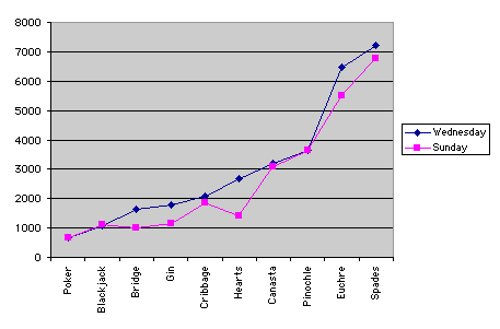

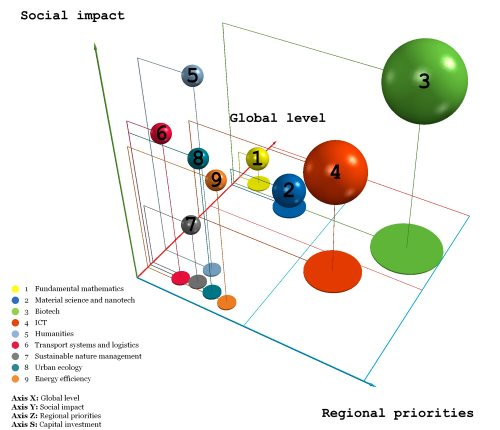

Many years of research have led us towards libraries of visualizations which are very good at transfering a certain narative. This makes it extra important to select the proper visualization, since visualizations can also very easily be used to create a false narative. Make sure that your visualization supports the narative that you have indeed found in the data.

Before creating a visualization, you should ask yourself what narrative you wish to communicate or what insight you wish to research. The visual follows the data. See also https://www.data-to-viz.com/ for more examples.

In [ ]:
import requests
from ipywidgets import Image
Image(value=requests.get('https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef0263ec2ab026200c-pi').content)
#Normal image visualisation did not work for some reason. Thanks google for alternatives!

We already saw that the visualization type should follow the data and the narrative that you want to show in the data. The tool that you use to create the visualization should also follow the data and visalization goal. Altough python is certainly capable of creating very complex visualizations, it is not it's biggest strength. Often, we use other software for visualization since it fit's our goals better:

Visualizations in python:
- Quick plots during data analysis to check for outliers, distributions or possible relationships
- Export of static plots that should always look the same but have to be created on-the-fly
- Communicating insights between collegues that also use python

Visualizations in excel:
- Visuals that should be adjustable by all collegues
- Visuals that have to be created once
- Visuals that should be easily recognizeable by end users
- Visuals that should fit corporate MS office style/template

Visualizations in BI tools:
- Visuals that should be interactive for end users

# Visualizations in Python

Python provides many libraries for datavisualisation. Almost all types of data-representation and charts are possible to generate within Python. Even interactive visualisations.

Within the scope of this class we discuss 4 types of visualisations:
* Pandas styles for table visualisations
* Matplotlib for quick and basic plots
* Seaborn for nicer and more complex graphics
* Bokeh for interactive plots (javascript engine with export to HTML)

So, many ways to get there. In the end it's up to you to choose!

## 5.3.1 Pandas styles & profiling

Usefull to make nice table visualisations to get much more information then only the raw data.
* Number formatting
* Highlighting data
* And many, many other options..!

Look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to get more options.

For the examples, let's first create a dataframe to use!

In [ ]:
import pandas as pd
# Read the data
df_airlines = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv")
df_airlines.head()

In [ ]:
# Add some new variables
## Fatalities as fraction from the available seat_km per week (millions!)
df_airlines['fatalities_85_99_frac'] = df_airlines.fatalities_85_99 / (df_airlines.avail_seat_km_per_week/1e6)
### Check outcomes
df_airlines.describe()

In [ ]:
# Add categorical variable if calculated percentage > 5%: airline = dangerous
df_airlines['Dangerous'] = df_airlines.fatalities_85_99_frac.apply(lambda x: 1 if x>0.05 else 0)
df_airlines.head()

**Formatting with symbols**

Back to Pandas styles.  Let's add symbols to the data by using `format()` and a format-dictionairy.

In [ ]:
# Format some variables
## the added variable (percentage) to give us a representation with a percentage symbol
## the variable avail_seat_km_per_week variable with a currency symbol (ok, that doesn't make sense, but just as an example)
format_dict = {'avail_seat_km_per_week':'${0:,.2f}','fatalities_85_99_frac':'{:.2%}'}
df_airlines.head().style.format(format_dict)

This only impacts the display, not the data itselve!

**Highlighting**

By using `.highlight_min()` and `.highlight_max()` after the `style` method, you can easily add conditional color-formatting.

In [ ]:
# Highlight the max and min values
df_airlines.head().style.highlight_min(color='blue').highlight_max(color='red')

You can specify the colors with a [predefined python-colorname](https://python-graph-gallery.com/python-colors/) or with a hex-code.

Or use a gradient with `.background_gradient()` whereby it's also possible to specify specific columns.

In [ ]:
# Highlight specific columns with a gradient
df_airlines.head().style.background_gradient(subset=['avail_seat_km_per_week', 'incidents_85_99'], cmap='BuGn')

We can also use bars, simpy by adding `.bar()` after style..

In [ ]:
# Highlight specific columns with a bar representing the size
df_airlines.head().style.bar(subset=['avail_seat_km_per_week', 'incidents_85_99'], color='red')

In [ ]:
# In combination with sort_values
df_airlines.head(20).sort_values('avail_seat_km_per_week', ascending=False).style.bar(subset=['avail_seat_km_per_week', 'incidents_85_99'], color='green')

<div class="alert alert-success">

# Exercise time 5!
* Import the tips-dataset from seaborn: `tips = sns.load_dataset("tips")`
* Add a column tip_percentage with the tip as percentage from the total_bill 
* Format the columns (unit-symbols): dollars and percentage
* Play with conditional formatting of this column with colors, bars, etc

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

## 5.3.2 Matplotlib

Pythons most basic library for visualizing data.

Base structure of 2 components:
* Figure: the layout on which all other parts are drawn
* Axes: chart-area boundaries

In [ ]:
# Let's use a dataset from FiveThirtyEight (FTE) about the gender-gap / percentage of female bachelor degrees per subject 
url = 'https://raw.githubusercontent.com/johnashu/datacamp/abb93eede7ed3d520de78e61fb6cb671156e8e93/percent-bachelors-degrees-women-usa.csv' #So we can get our results
women_majors = pd.read_csv(url)
women_majors.head()

In [ ]:
# Start importing this library using the `plt` convention
import matplotlib.pyplot as plt

# We want to plot the figures in line, so let's do some magic
%matplotlib inline

# You should use plt.show() after the plt.functions when you work in the terminal of with a script!

# OK, lets make a simple plot of this dataset for just one subject (Agriculture)
plt.plot(women_majors.Year, women_majors.Agriculture)
plt.show()

It's possible to make the graphs of multiple variables in just one graph. Usefull for comparison!

In [ ]:
# Compare three subjects: Agriculture, Architecture, Art and Performance
plt.plot(women_majors.Year, women_majors.Agriculture)
plt.plot(women_majors.Year, women_majors.Architecture)
plt.plot(women_majors.Year, women_majors['Art and Performance']) # See the difference in the syntax?
plt.show()

OK, nice. But what is this plot about when you only get this figure?

Let's add some extra information:
* Labels
* Title
* Grid
* Legend

In [ ]:
# Compare three subjects: Agriculture, Architecture, Art and Performance
plt.plot(women_majors.Year, women_majors.Agriculture)
plt.plot(women_majors.Year, women_majors.Architecture)
plt.plot(women_majors.Year, women_majors['Art and Performance']) # See the difference in the syntax?

plt.xlabel('Year')
plt.ylabel('Percentage of women in bachelor degrees')
plt.title('The gender-gap in transitory')
plt.grid(True)

Ah nice! But what line represents each subject?

A legend will do the job! 

We can directly add a legend by `.legend()` but first we need to specify in each plot statement what the legend-lable has to be.

In [ ]:
# Compare three subjects: Agriculture, Architecture, Art and Performance
plt.plot(women_majors.Year, women_majors.Agriculture, label='Agriculture')
plt.plot(women_majors.Year, women_majors.Architecture, label='Architecture')
plt.plot(women_majors.Year, women_majors['Art and Performance'], label='Art and Performance') # See the difference in the syntax?

plt.xlabel('Year')
plt.ylabel('Percentage of women in bachelor degrees')
plt.title('The gender-gap in transitory')
plt.grid(True)
plt.legend()

**Subplots**

It's also possible to draw multiple plots in just one figure by using `fig, axes = plt.subplots()`

You can define per axes-dimensions (2D) what plot you want.

Even different types of plots are possible (e.g. mix of lineplots, barcharts, etc)

In [ ]:
# Let's create a figure with 2 by 2 subplots
fig, axes = plt.subplots(2,2)
axes[0, 0].plot(women_majors.Year, women_majors.Agriculture, label='Agriculture')
axes[0, 1].bar(women_majors.Year, women_majors.Architecture, label='Architecture')
axes[1, 0].hist(women_majors['Art and Performance'], label='Art and Performance')
axes[1, 1].scatter(women_majors.Year, women_majors['Art and Performance'], label='Art and Performance')

It's also possible to add text to the plot. This is quite usefull to mark special events or to customize the plots.b

You have to specify the coördinations of the text position. These coördinations use the same units as the graph.

In [ ]:
# Compare three subjects: Agriculture, Architecture, Art and Performance
plt.plot(women_majors.Year, women_majors.Agriculture, label='Agriculture')
plt.plot(women_majors.Year, women_majors.Architecture, label='Architecture')
plt.plot(women_majors.Year, women_majors['Art and Performance'], label='Art and Performance') # See the difference in the syntax?

# Add additional info
plt.xlabel('Year')
plt.ylabel('Percentage of women in bachelor degrees')
plt.title('The gender-gap in transitory')
plt.grid(True)
plt.legend()

# Add text to the plot: source in the upper-middle and an annotation for a remarkakle event
plt.text(x=1985, y=25, s='Source: FiveThirtyEight (538)') #Coordinates use the same units as the graph
plt.annotate('What happened?', xy=(1990, 41), xytext=(1985, 50), arrowprops={'facecolor':'red', 'shrink':0.05})

Just some basic features and plot-examples, but Matplotlib has many, many more. See the [documentation](https://matplotlib.org/gallery/index.html) for more examples and options.

<div class="alert alert-success">

# Exercise time 6!
* Load the airlines data and filter the top-10 airlines with the most incidents in total for the periods 1985-1999 and 2000-2014.
* Create a grouped bar chart with the ten airlines on the x-axis, the number of incidents on the y-as and the periods (1985-1999 and 2000-2014) as groups. _Hint: check documentation link above!_
* Add the basic elements: title, axis-labels, legend, but also a subtitle.
* Change position of the legend
* Optional: 
    * Add textlabels with values above each bar
    * Create a second plot with a stacked bar per airline with the number of incidents over the two periods stacked

In [ ]:
# Read the data
df_airlines = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv")









## 5.3.3 Seaborn

Seaborn is based on Matplotlib but gives us some help to creater nicer graphics with less code.

To make this happen, import the Seaborn library (with convention to call it sns) and initialize the 'Seaborn-style' by `sns.set()`.

In [ ]:
# Import and initialize seaborn
import seaborn as sns
sns.set()

# Remember the Titanic-dataset? Indeed, Seaborn library contains datasets that we can directly load
tips = sns.load_dataset("tips")
tips.head()

In [ ]:
# Let's make a scatterplot of the tip vs. total_bill
sns.scatterplot(tips[["total_bill", "tip"]], x = "total_bill", y = "tip")
plt.show() #Build upon matplotlib

Great! We directly have axis-labels and a grid without coding this..

Let's add more information in the figure to show the power of Seaborn!

We are interested if there's a difference between the time of the visit: Lunch vs. Diner. Let's create two separate plot in one figure by using `sns.relplot()`.

In [ ]:
# Create separate plots for Lunch and Dinner
sns.relplot(x="total_bill", y="tip", col="time", data=tips)

Ah interesting.. is there maybe a difference between men and women?

In [ ]:
# Color the dots, based on gender
sns.relplot(x="total_bill", y="tip", col="time", hue='sex', data=tips)

Maybe also the number of people per bill are interesting as well?

In [ ]:
# Make the size of the dots representing the size of the group
sns.relplot(x="total_bill", y="tip", col="time", hue='sex', size='size', data=tips)

**Heatmap**

Very usefull to get a quick oversight of the correlations in a dataset

In [ ]:
sns.heatmap(tips[['total_bill', 'tip', 'size']].corr(), annot=True, fmt='.2f')

**Pairplot**

Usefull to see the relations in a dataset.

In [ ]:
sns.pairplot(tips)

In [ ]:
# And add also the categorical info
sns.pairplot(tips, hue='sex')

**Joint plot**

Combination of histogram and distribution plot of two variables.

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips)
plt.show()

And again.. this is just a preview. Seaborn has many, many more. See the [documentation](https://seaborn.pydata.org/examples/index.html) for more examples and options.

<div class="alert alert-success">

# Exercise time 7!
* Load the dataset 'exercise' from seaborn. This datasets contains for different people (id) the heart-pulse on 3 times and information about their diet.
* Create a grouped boxplot with the pulse on the y-axis, the time on the x-axis and the kind of activity as groups. Hint: use `sns.catplot()` and play around with the different kinds of plots as described in the documentation.
* Update the previous plot to get a so-called facetgrid with two figures for the separate diets.


In [ ]:
exercise = sns.load_dataset("exercise", index_col=0)

exercise.head(5)





**Pandas profiling**

Descriptive 2.0

Get a report of your dataset with only 3 rows of code!

!! You have to install the pandas_profiling library !!

More information about Pandas Profiling in this [article](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3)

In [ ]:
#Running this code will install pandas_profiling in the python version you are currently using:
#This will take some time...

#import sys
#!{sys.executable} -m pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(exercise)
prof

## 5.3.4 Bokeh

Over the years lots of python libraries have been created that extend python plotting capabilities even further. The most challgening aspect that packages tackle is creating interactive visualizations. For demonstration purposes we use the <code>bokeh</code> library in this class, which is implemented in javascript. Once again, we do not have time to show all capabilities of the package. 

In [ ]:
from bokeh.plotting import figure, output_file, output_notebook, show, reset_output, gridplot
#Bokeh comes in two flavours: bokeh.plotting (easier) and bokeh.models (more options), we will use bokeh.plotting
#If you do not have bokeh in your distribution, install it trough anaconda navigator or prompt
output_notebook()

In [ ]:
# prepare some data.
# Bokeh likes to work with lists, or lists of lists
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# create a new figure with a title
p = figure(title="simple line example")

# add a line with specified line thickness
p.line(x, y, line_width=2)

# show the results
show(p)

In [ ]:
x = [1,2,4]
y = [1,2,3]

#bokeh always starts with defining a figure
p = figure()

#Many different visualizations to add to the figure
p.scatter(x,y,legend_label='scatter')
p.circle(x,y,legend_label='circle')
p.line(x,y,legend_label='line')
p.step(x,y,legend_label='step')

#With many different options
p.multi_line([[1, 3, 2], [3, 4, 6, 6]], [[2, 1, 4], [4, 7, 8, 5]],
             color=["firebrick", "navy"], alpha=[0.8, 0.3], line_width=4)
p.vbar(x=[1, 2, 3], width=0.5, bottom=0,
       top=[1.2, 2.5, 3.7], color="firebrick")
p.hbar(y=[1, 2, 3], height=0.5, left=0,
       right=[1.2, 2.5, 3.7], color="navy")
p.rect(x=[2, 4, 5], y=[1, 2, 3], width=0.2, height=40, color="#CAB2D6",
       angle=3.1415/3, height_units="screen",legend_label='rectangle')

show(p)


In [ ]:
#More complex examples
p = figure()
p.multi_polygons(xs=[[[ [1, 1, 2, 2], [1.2, 1.6, 1.6], [1.8, 1.8, 1.6] ], [ [3, 4, 3] ]]],
                 ys=[[[ [4, 3, 3, 4], [3.2, 3.2, 3.6], [3.4, 3.8, 3.8] ], [ [1, 1, 3] ]]])

show(p)


In [ ]:
#Bokeh can also easily handle categorical data
factors = ["a", "b", "c", "d", "e", "f", "g", "h"]
x = [50, 40, 65, 10, 25, 37, 80, 60]

#And save the output as html so everyone can open it!
output_file("categorical.html")

p = figure(y_range=factors)

p.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3)

show(p)

reset_output() #makes sure that you don't overwrite your output
output_notebook() #And that following plots will once again be only showed in the notebook

In [ ]:
#Change toolbar functionality in the figure function
p = figure(title=None, toolbar_location="below")

p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

show(p)


In [ ]:
#Or make only certain tools useable for end users
p = figure(tools="pan,tap,box_select,redo,save,hover", active_drag="pan") # You can also add multiple tools with a comma-separated string containing tool shortcut name
p.circle([1, 2, 3, 4, 5], [2, 5, 8, 2, 7], size=10)

show(p)
#See https://docs.bokeh.org/en/latest/docs/user_guide/tools.html for all tools

See the bokeh userguide for more examples!
https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide

**Summary**

In [ ]:
sns.reset_orig() #Styling resetten

Matplotlib

In [ ]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

plt.plot(x,y)
plt.show()

Seaborn

In [ ]:
sns.set()
sns.lineplot(x = x, y = y)
plt.show()

Bokeh

In [ ]:
p = figure()
p.line(x,y)
show(p)

# 5.4 Error handling

While playing around with the previous notebooks you will no doubt have come accross errors in python. Let's dive into these a bit deeper! Roughly three types of errors exist:
- Jupyter notebook errors: Something goes wrong between your jupyter notebook view and the underlying python executor (kernel)
- Syntax errors: Python does not understand the code you are trying to have it execute and will thus not execute it entirely.
- Exceptions: Python is executing the code but sees something unexeptable, so it will halt execution.
- Semantic errors: The code runs without errors or exceptions but returns something unexpected.

Although all errors are different, two steps will always help you to undertand them:
    
1. Google is your best friend! A google search of the problem you have will lead you to others that have experienced this problem before.
2. Divide and conquer. Change long and unclear codes or actions into smaller bits to see where the problem lies exactly. Make sure all lines of code execute only a single action and use lots of print statements to see in which line the error lies.

## 5.4.1 Jupyter notebooks

Jupyter notebooks, for our use-case, are just web-interfaces that allow us to run python code in between blocks of text. The execution of the python code is performed in the background by so-called kernels. Sometimes we crash these kernels or lose connection with them. We can use our web-interface to restart or reconnect to our kernel is such cases.

Errors with jupyter are characterized by not being able to run python at all or never recieving the results of our code. When restarting the kernel does not solve your issue, restarting jupyter notebook might offer the solution. Otherwise google is your best friend.

## 5.4.2 Syntax errors

Every language follows specific rules. In programming languages this is called the <code>syntax</code>. A <code>SyntaxError</code> therefore is a way for python to let you know that you did wrote code that does not fit within the <code>syntax</code> rules of the python language. 

Most high level programming languages, python included, do not just execute your python code the way we read it. Before execution, writting code is translated into something called <code>byte code</code> for quicker execution. Therefore <code>SyntaxErrors</code> are returned during translation, before anyting is properly executed. <code>SyntaxErrors</code> are therfore the first feedback you will recieve and will halt python from excecuting any code.

In [ ]:
# A syntaxerror will show you the file and line where the error occured
# In this line, a caret "^" will show you the location where the error occured
for i in range(1,2)
print i

In [ ]:
#When possible, the error message will tell you what is wrong
5 = "test"

In [ ]:
# An indentationError is a special kind of syntax error
# So is the taberror, for inconsitent use of spaces and tabs (more rare)
for i in range(1,2):
print i

Syntax errors are very common and can follow from:
- Misspelling words or signs (such as variables, operations or keywords)
- Missing these altogether
- Misusing parenthesis, brackets or quotes
- Different python versions

Most often these happen when writing quick code.The divide and conquer tactic ususally helps to fix these. You can pre-empt using the tactic by running all code seperately before improving or combining it. Quick google searchers can also refresh your memory for the proper syntax.

## 5.4.3 Exceptions

A broader group of errors are so called exceptions. The occur during the execution of your code and can therefore only happen when no <code>SyntaxError</code> is found in your code. (yay!) The following table shows an overview of exception errorcodes and causes.

In [ ]:
import pandas as pd
pd.set_option('max_colwidth',80) #Setting an option so Pandas will show wider columns
errors = pd.read_html('https://www.programiz.com/python-programming/exceptions')[0] #An overview of the exceptions python can raise.
errors[(errors.Exception != 'TabError') & (errors.Exception != 'SyntaxError') & (errors.Exception != 'SyntaxError')]
errors

In [ ]:
#For example:
1/0

In [ ]:
#or
l = [1,2,3]
l[15]

In [ ]:
#Exceptions also show a traceback
def firstfunc(x):
    return x**2

def secondfunc(x):
    return firstfunc(x)

secondfunc('test')

In [ ]:
#Traceback can be very long in big packages like pandas
pd.DataFrame([1,2,1,2.3], index=['A'])

### 5.4.3.1 Dealing with exceptions

When exceptions are raised by python, it stops excecuting the code. However, since we know the whole code is syntactically correct, we can also tell python to ignore the exception and continue excecuting (other) code. For this purpose, we use the keywords <code>try</code> and <code>except</code> as follows:

```python
try:
   #Excecute this code
except:
   #Execute this code when an error occurs
```

In [ ]:
#For example:
excel_dfs = []
for file in os.listdir():
    try:
        df = pd.read_excel(file)
        excel_dfs.append(file)
        print(file + " was added to list as dataframe")
    except:
        print("! " + file + " could not be added using pd.read_excel()")
excel_dfs

In [ ]:
#Else statement also works:
excel_dfs = []
for file in os.listdir():
    try:
        df = pd.read_excel(file)
        excel_dfs.append(file)
    except Exception as e: #You can also catch the exception with this line
        print("! " + file + " could not be added using pd.read_excel()")
        print("! details: "+str(e)) 
    else:
        print(file + " was added to list as excel dataframe")
excel_dfs

We can also except only specific errors. This allows us to execute specific kinds of code when specific kinds of errors occur:

In [ ]:
try:
    print(x)
except NameError:
    print("Variable x is not defined")
except:
    print("Something else went wrong while printing variable x")
    
y = {1:2}
try:
    print(y+1)
except NameError:
    print("Variable y is not defined")
except:
    print("Something else went wrong while printing variable y")


In [ ]:
#Very helpfull! Catching the error
y = {1:2}
try:
    print(y+1)
except NameError as namerr:
    print("Variable y is not defined")
    print(namerr)
except Exception as othererr:
    print("Something else went wrong")
    print(othererr)


Somtimes we want python to just continue when a certain exception occurs. We can use the <code>pass</code> keyword to just pass on. This keyword is often used for functions that do nothing (yet), since python will want not accept empty lines.

In [ ]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        pass

Python gives us a bit more flexibility in handling exceptions by allowing us to also use <code>else</code> and <code>finally</code> with our try/except blocks.

```python
try:
   #Excecute this code
except:
   #Execute this code when an exception occurs
else:
   #Execute this code when no exception occurs
finally:
   #Execute this code regardless of errors

#Execute this code regardless of errors
```

In [ ]:
y=1
try:
    print(y+1)
except NameError as namerr:
    print("Variable y is not defined")
    print(namerr)
except Exception as othererr:
    print("Something else went wrong")
    print(othererr)
else:
    print("doing something with Y now...")
    z = 1+y
finally:
    print("Finished try/except lines for y")

### 5.4.3.2 Raising your own exceptions

Exceptions can also be raised by the user. this can be very usefull when writing functions for others to use. You can use the keyword <code>raise</code> to either raise a general exception or a specific one (so that others can properly catch it in their try/except statement). 

In [ ]:
x = -1
if x < 0:
    raise Exception("Sorry, no numbers below zero")
    

In [ ]:
def double(x):
    """This function returns the double of input (x).
    Only accepts integers and floats as input.
    Will raise a TypeError when other datatypes are used as input"""
    if type(x) != int and type(x) != float:
        raise TypeError("Only integers or floats allowed in doubler function")
    return x+x

In [ ]:
print(double(5))
double("test")

<div class="alert alert-success">

# Exercise time 8!
- I want to count the number of likes, comments and photos of all my blogposts using the data in the blog_post dictionary but my code doesn't work! Use the provided for loop but add try/except clauses to deal with exceptions.
- Rewrite your working code to a function that can calculate the number of likes, comments and photo's for others as well. Make sure the proper exceptions are raised if users try to call the function with faulty data.

Tip: For proper calcuations, the code should react differently when different errors occur.

Tip: print() statements can help to show you where in a loop an errors occurs.

In [ ]:
blog_posts = [{'Photos': 3, 'Likes': 21, 'Comments': 2}, 
              {'Likes': 13, 'Comments': 2, 'Shares': 1}, 
              {'Photos': 5, 'Likes': 33, 'Comments': 8, 'Shares': 3}, 
              {'Comments': 4, 'Shares': '2'}, 
              {'Photos': 8, 'Comments': 'none', 'Shares': 1}, 
              {'Photos': 3, 'Likes': 19, 'Comments': 3}]

In [ ]:
#For first exercise:
total_likes = 0
total_comments = 0
total_photos = 0

for post in blog_posts:
    
    total_likes = total_likes + post['Likes']

    total_comments = total_likes + post['Comments']
    
    total_photos = total_photos + post['Photos']

total_likes   

In [ ]:
# Enter your code here





## 5.4.4 Semantic errors

Semantic errors are often the hardest errors to find in your code. These occur when your code compiles and runs without errors, but still does not return you the values you want. These often have the same cause as syntax errors: a quick typo or a partial understanding of the meaning of the written code. As with other errors, use the two error strategies:

1. Google is your best friend! A google search of the problem you have will lead you to others that have experienced this problem before.
2. Divide and conquer. Change long and unclear codes or actions into smaller bits to see where the problem lies exactly. Make sure all lines of code execute only a single action and use lots of print statements to see in which line the error lies.

In [ ]:
num1 = input('Enter a number:')
num2 = input('Enter another number:')
sum = num1 + num2

print('The sum of', num1, 'and', num2, 'is', sum)
# The result is not wat we want. The error is that the programs performs concatenation instead of addition. 
# Failed to write the code to converts the input to integers. 


Please see appendix A of think python for more help on debugging:
http://openbookproject.net/thinkcs/python/english3e/app_a.html

<div class="alert alert-success">

# Selfstudy

Work on your own project

In [ ]:
# Try what you have learned here on your own project.



